In [2]:
import adaptivetesting
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
x = np.linspace(-10, 10, 1000)

In [4]:
from adaptivetesting.math.estimators import likelihood, CustomPrior, maximize_posterior

In [5]:
import pandas as pd
items = pd.DataFrame({"a":[1.3024,1.078,0.8758,0.5571,1.225,0.991,0.9968,1.1888,1.1642,1.1188],"b":[-0.6265,0.1836,-0.8356,1.5953,0.3295,-0.8205,0.4874,0.7383,0.5758,-0.3054],"c":[0.2052,0.1618,0.1957,0.1383,0.1324,0.1973,0.0058,0.1193,0.1831,0.1732],"d":[0.8694,0.9653,0.8595,0.8112,0.7677,0.7749,0.8291,0.8797,0.9155,0.8517]})

In [6]:
response_pattern = np.array([0,0,1,1,1,0,0,0,0,1])

In [7]:
lik_values = [likelihood(i, items["a"].to_numpy(), items["b"].to_numpy(), items["c"].to_numpy(), items["d"].to_numpy(), response_pattern) for i in x]

In [8]:
# calculate
custom_prior = CustomPrior(scipy.stats.beta, 0.6, 0.9)

prior_values = np.array(custom_prior.pdf(x))

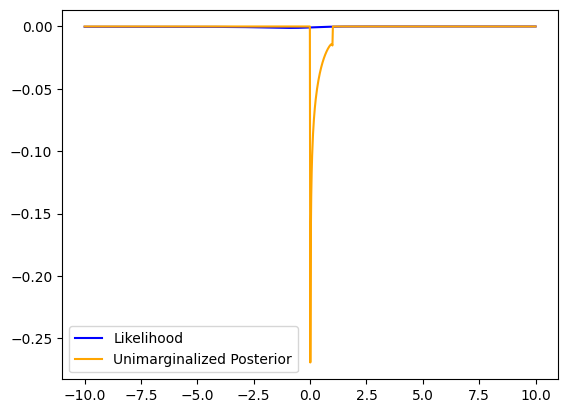

In [9]:
fig, ax = plt.subplots()
ax.plot(x, lik_values, color="blue", label="Likelihood")
# ax.plot(x, -prior_values, color="red", label="Prior")
ax.plot(x, prior_values * lik_values * 100 , color="orange", label="Unimarginalized Posterior")
ax.legend()

In [10]:
maximize_posterior(
    a=items["a"].to_numpy(),
    b=items["b"].to_numpy(),
    c=items["c"].to_numpy(),
    d=items["d"].to_numpy(),
    response_pattern=response_pattern,
    prior=custom_prior
)

9.99999335625205

In [11]:
min(lik_values * prior_values)

np.float32(-0.0026948217)

In [12]:
from scipy.optimize import minimize_scalar, minimize

print(minimize_scalar(lambda x: likelihood(x, items["a"].to_numpy(), items["b"].to_numpy(), items["c"].to_numpy(), items["d"].to_numpy(), response_pattern) * custom_prior.pdf(x) * 10,
                bounds=(-10, 10)))

print(minimize(lambda x: likelihood(x, items["a"].to_numpy(), items["b"].to_numpy(), items["c"].to_numpy(), items["d"].to_numpy(), response_pattern) * custom_prior.pdf(x) * 10,
      x0=-10, callback=lambda res: print(res), method="BFGS"))

 message: Solution found.
 success: True
  status: 0
     fun: -0.0
       x: 9.99999335625205
     nit: 31
    nfev: 31
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.0
        x: [-1.000e+01]
      nit: 0
      jac: [ 0.000e+00]
 hess_inv: [[1]]
     nfev: 2
     njev: 1


In [26]:
from scipy.integrate import quad

result, _ = quad(lambda mu: -likelihood(mu, items["a"].to_numpy(), items["b"].to_numpy(), items["c"].to_numpy(), items["d"].to_numpy(), response_pattern),
     a = -10,
     b = 10)

print(result)

0.005146304854022712
